In [3]:
import pandas as pd
df = pd.read_csv('/content/Company_Data.csv')

In [4]:
df.info()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Convert 'Sales' to a categorical variable
df['Sales_Category'] = pd.cut(df['Sales'], bins=[0, 6, 11, 17], labels=['Low', 'Medium', 'High'])
df.drop('Sales', axis=1, inplace=True)

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df_categorical = df[['ShelveLoc', 'Urban', 'US']]
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df_categorical)
# Convert the result to a DataFrame with column names
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(df_categorical.columns))

df = df.drop(['ShelveLoc', 'Urban', 'US'], axis=1)
df = pd.concat([df, df_encoded], axis=1)

print(df)


     CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

    Sales_Category  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  \
0           Medium            

In [7]:
# Use label encoding for Sales_Category
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sales_Category'] = label_encoder.fit_transform(df['Sales_Category'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompPrice         400 non-null    int64  
 1   Income            400 non-null    int64  
 2   Advertising       400 non-null    int64  
 3   Population        400 non-null    int64  
 4   Price             400 non-null    int64  
 5   Age               400 non-null    int64  
 6   Education         400 non-null    int64  
 7   Sales_Category    400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    float64
 9   ShelveLoc_Good    400 non-null    float64
 10  ShelveLoc_Medium  400 non-null    float64
 11  Urban_No          400 non-null    float64
 12  Urban_Yes         400 non-null    float64
 13  US_No             400 non-null    float64
 14  US_Yes            400 non-null    float64
dtypes: float64(7), int64(8)
memory usage: 47.0 KB


In [9]:
X = df.drop('Sales_Category', axis=1)

In [10]:
# Initialize the Isolation Forest model
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # You can adjust the contamination parameter
isolation_forest.fit(X)

# Predictions: 1 for inliers (normal observations), -1 for outliers (anomalies)
outlier_predictions = isolation_forest.predict(X)

# Create a new column 'IsOutlier' in the original DataFrame
df['IsOutlier'] = outlier_predictions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [11]:
print(df)

     CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     Sales_Category  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  \
0                 2            1.0     

In [12]:
df['IsOutlier'].value_counts()

 1    380
-1     20
Name: IsOutlier, dtype: int64

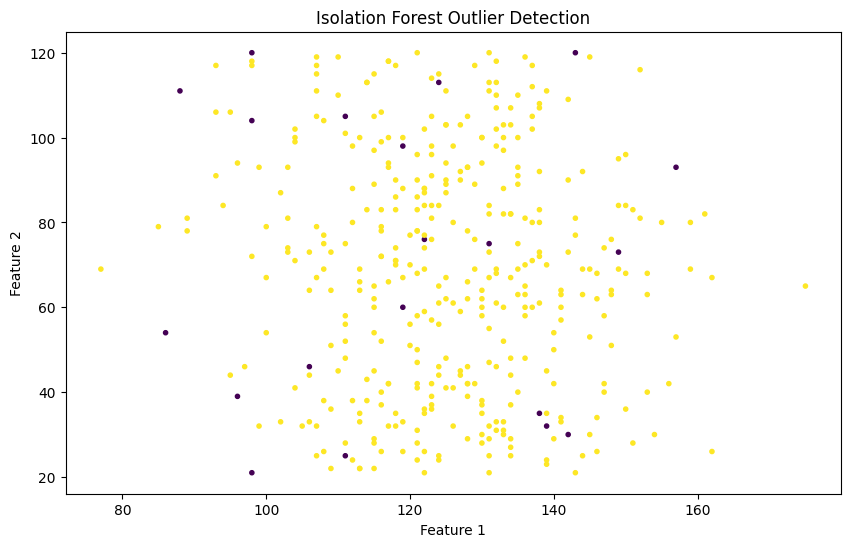

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 6))
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=df['IsOutlier'], cmap='viridis', marker='.')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [13]:
# Filter out rows where 'IsOutlier' is -1 (outliers)
df_no_outliers = df[df['IsOutlier'] == 1]
# Drop the 'IsOutlier' column as it's no longer needed
df_no_outliers = df_no_outliers.drop('IsOutlier', axis=1)
print(df_no_outliers)


     CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     Sales_Category  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  \
0                 2            1.0     

In [14]:
# Split the data
from sklearn.model_selection import train_test_split
X1 = df.drop('Sales_Category', axis=1)
y1 = df['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)


In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.59


In [17]:
# Additional metrics
print('\nClassification Report:\n', classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.20      0.32        15
           1       0.57      0.52      0.55        23
           2       0.58      0.76      0.66        42

    accuracy                           0.59        80
   macro avg       0.63      0.49      0.51        80
weighted avg       0.61      0.59      0.56        80



In [18]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [19]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [20]:
# Predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred_best_model= best_model.predict(X_test)

In [21]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_best_model)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


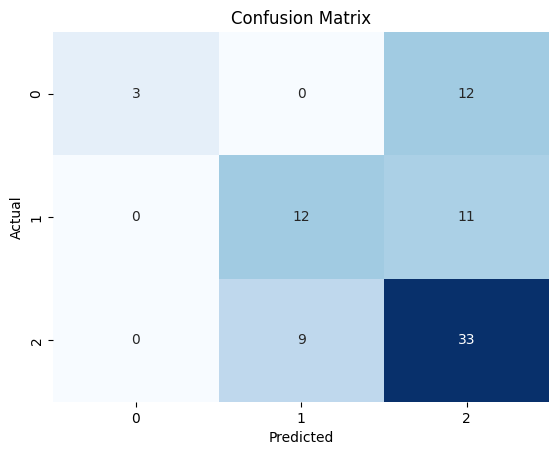

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_model)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Create a DataFrame to display feature importances
# Get feature importances from the trained model
feature_importances = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



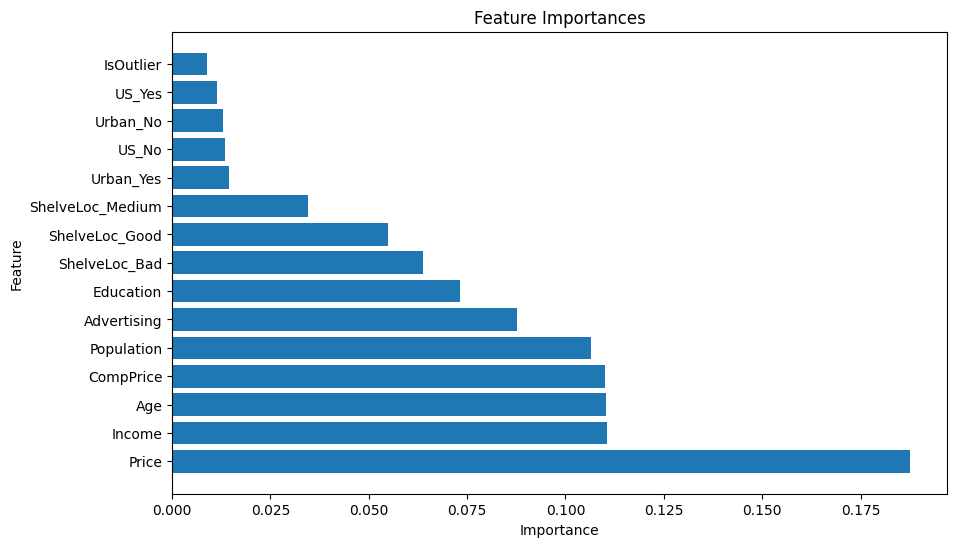

In [28]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [29]:
# we can infer from the plot that price is the feature variable that most affect the Sales.